In [46]:
#import necessary packages
from datetime import datetime
#import it in console with: pip install pandas-datareader
import pandas_datareader.data as wb
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
# Input
# ticker: list of chosen stock
# start_date: start date of search in YYYY-M-D format
# end_date: end date of search in YYYY-M-D format
# Output
# Pandas dataframe with fiance data
def get_data_from_api(ticker, start_date, end_date):
    dataframe = pd.DataFrame()
    dataframe = wb.DataReader(ticker, 'yahoo', start_date, end_date)
    return dataframe

In [48]:
# Get stock data about Microsoft and Apple from 1990-01-01 to 2021-01-01
# Multiple tickers
##tickerList = ['MSFT', 'AAPL']
start = datetime(1990,1,1)
end = datetime(2021,5,5)
tickerList = 'MSFT'
df = get_data_from_api(tickerList, start, end)

In [49]:
#print information
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7897 entries, 1990-01-02 to 2021-05-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       7897 non-null   float64
 1   Low        7897 non-null   float64
 2   Open       7897 non-null   float64
 3   Close      7897 non-null   float64
 4   Volume     7897 non-null   float64
 5   Adj Close  7897 non-null   float64
dtypes: float64(6)
memory usage: 431.9 KB


In [50]:
df.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1990-01-02,0.616319,0.598090,0.605903,0.616319,53035200.0,0.391455
1990-01-03,0.626736,0.614583,0.621528,0.619792,113774400.0,0.393661
1990-01-04,0.638889,0.616319,0.619792,0.638021,125740800.0,0.405239
1990-01-05,0.638889,0.621528,0.635417,0.622396,69566400.0,0.395315
1990-01-08,0.631944,0.614583,0.621528,0.631944,58982400.0,0.401380
1990-01-09,0.638889,0.626736,0.631944,0.630208,70300800.0,0.400277
1990-01-10,0.633681,0.611979,0.625000,0.612847,103766400.0,0.389250
1990-01-11,0.621528,0.590278,0.616319,0.600694,95774400.0,0.381531
1990-01-12,0.605903,0.583333,0.591146,0.598090,148910400.0,0.379877


In [51]:
#Print first 10 closing price from Microsoft
df['Close'].head(10)

Date
1990-01-02    0.616319
1990-01-03    0.619792
1990-01-04    0.638021
1990-01-05    0.622396
1990-01-08    0.631944
1990-01-09    0.630208
1990-01-10    0.612847
1990-01-11    0.600694
1990-01-12    0.598090
1990-01-15    0.598090
Name: Close, dtype: float64

In [52]:
#Print first 10 closing price from Apple
df['Close'].head(10)

Date
1990-01-02    0.616319
1990-01-03    0.619792
1990-01-04    0.638021
1990-01-05    0.622396
1990-01-08    0.631944
1990-01-09    0.630208
1990-01-10    0.612847
1990-01-11    0.600694
1990-01-12    0.598090
1990-01-15    0.598090
Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

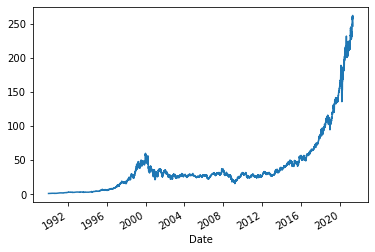

In [53]:
#Visualize the closing price
# plot line
df['Close'].plot()

In [54]:
#Set index as datetime
df.index = pd.to_datetime(df.index)

In [55]:
## Preprocess data
df['Label'] = df['Close'].shift(-1)
df = df.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis=1)
df_eth = df.dropna()

#Standarizing
df = (df-df.mean())/df.std()

df.head(10)


,Close,Label
Date,,
1990-01-02,-0.854624,-0.854641
1990-01-03,-0.854547,-0.854236
1990-01-04,-0.854142,-0.854583
1990-01-05,-0.854489,-0.854371
1990-01-08,-0.854277,-0.854409
1990-01-09,-0.854316,-0.854795
1990-01-10,-0.854701,-0.855065
1990-01-11,-0.854971,-0.855123
1990-01-12,-0.855029,-0.855123


In [56]:
# Array splicing and splitting of data
rd = df_eth.to_numpy()

X, y = rd[:, :-1], rd[:, -1]
import math
# pct split
limit = math.floor(len(X) * 0.8)

X_train, X_test = X[:limit,:],X[limit:,:]

y_train, y_test = y[:limit],y[limit:]


In [57]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)

model.score(X_test, y_test)
predictions = model.predict(X_test)
print("Actual: ", y_test[:3])
print("Forecasted: ", predictions[:3])

Actual:  [42.65999985 41.18999863 42.00999832]
Forecasted:  [46.99912005 42.65227972 41.18334573]


In [58]:
## MLP Reg
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
print(regr.score(X_train, y_train))
MLPpredictions = regr.predict(X_test)

print(regr.score(X_test, y_test))

0.9983948358381166
0.9973957394345818


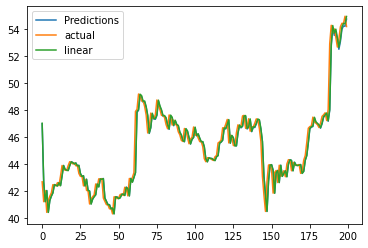

In [59]:
#Visualize to understand the model behaviour
df_pred = pd.DataFrame(data=MLPpredictions, columns=["Predictions"])
df_pred["actual"] = y_test.tolist()
df_pred["linear"] = predictions.tolist()
df_pred[:200].plot()
plt.show()